In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read Data
climate_df = pd.read_csv('climate.csv')
climate_df['date'] = pd.to_datetime(climate_df[['Year', 'Month', 'Day']])
climate_df = climate_df.rename(
    columns={
        'Bureau of Meteorology station number':'station_id',
        'Maximum temperature (Degree C)': 'max_temp',
        'Minimum temperature (Degree C)': 'min_temp',
        'Rainfall amount (millimetres)': 'rainfall'
    }
)

vis_raw = pd.read_csv('visitation_raw.csv')
vis_clean = pd.read_csv('visitation.csv')

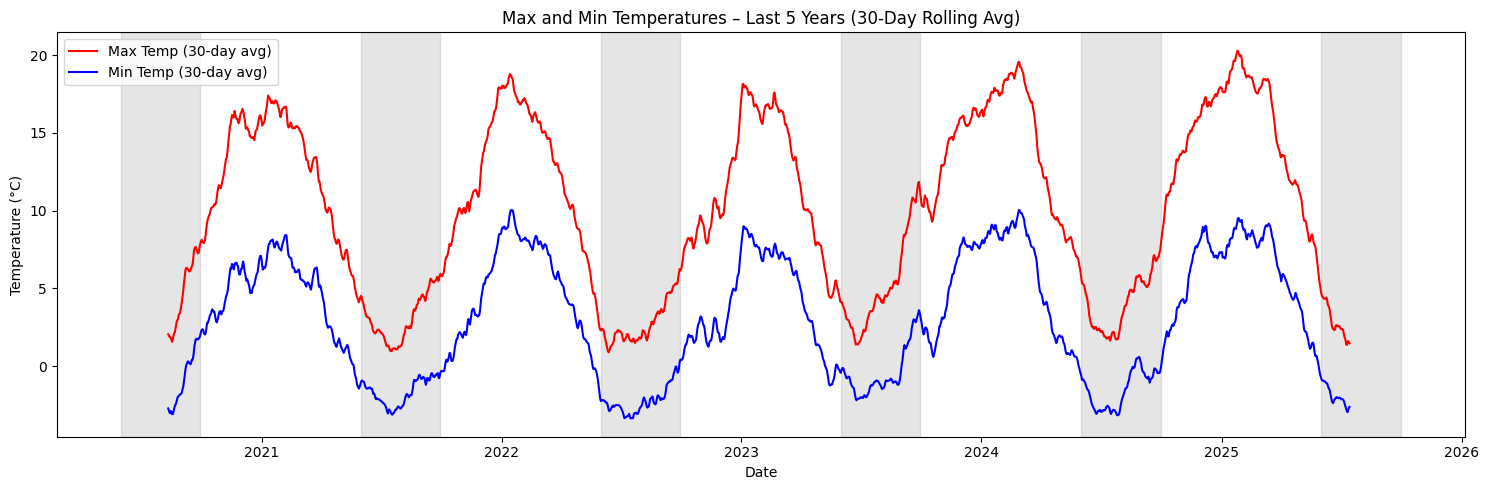

In [12]:
## TEMPERATURE TRENDS - 30 Day Rolling Average Over Last 5 years

# Filter the last 5 years
latest_date = climate_df['date'].max()
start_date = latest_date - pd.DateOffset(years=5)
df_last = climate_df[climate_df['date'] >= start_date]

df_last_daily = df_last.groupby('date').agg({
    'max_temp':'mean',
    'min_temp':'mean',
    'rainfall': 'sum'
}).reset_index()

# Calculate 30-day rolling averages
df_last_daily['max_temp_30d'] = df_last_daily['max_temp'].rolling(30, center=True).mean()
df_last_daily['min_temp_30d'] = df_last_daily['min_temp'].rolling(30, center=True).mean()
df_last_daily['rainfall_30d'] = df_last_daily['rainfall'].rolling(30, center=True).sum()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_last_daily['date'], df_last_daily['max_temp_30d'], label='Max Temp (30-day avg)', color='red')
ax.plot(df_last_daily['date'], df_last_daily['min_temp_30d'], label='Min Temp (30-day avg)', color='blue')

# Highlight June–September every year (Ski season)
for year in range(df_last_daily['date'].dt.year.min(), df_last_daily['date'].dt.year.max()+1):
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-09-30')
    ax.axvspan(start, end, color='gray', alpha=0.2)

ax.set_title('Max and Min Temperatures – Last 5 Years (30-Day Rolling Avg)')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.legend()
plt.tight_layout()

Temperature Data reveals a clear trend, as expected the troughs of this graph align with the winter months (highlighted). As such, a sanity check has been conducted on the data and we can say it aligns with our expectations.

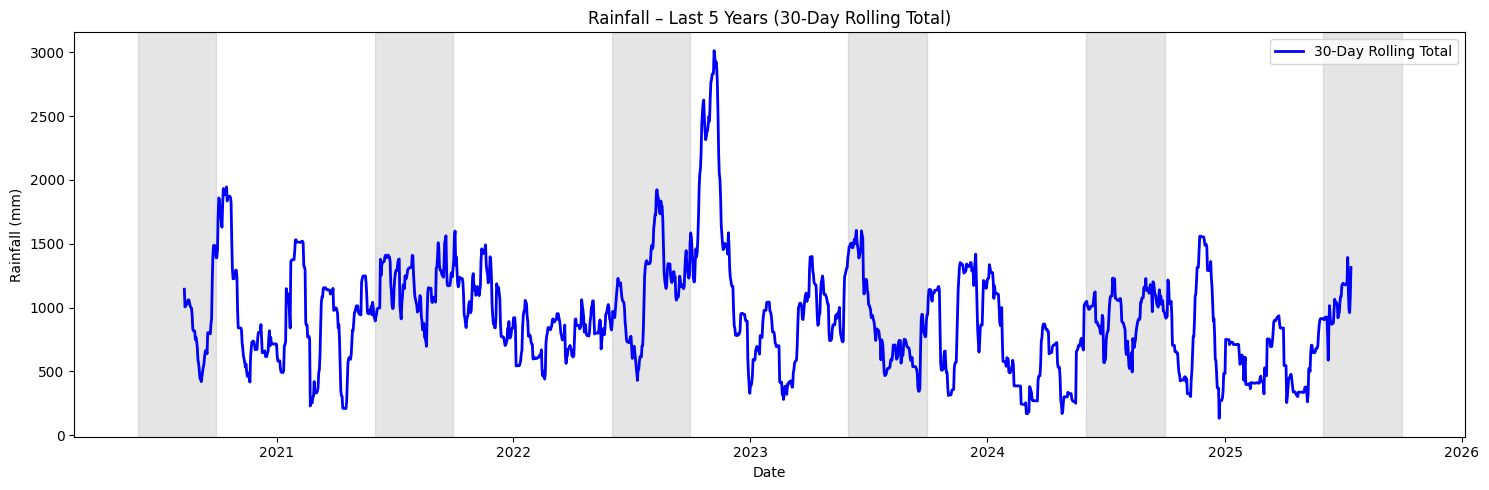

In [13]:
## RAINFALL TRENDS - 30 Day Rolling Total Over Last 5 Years
fig, ax = plt.subplots(figsize=(15,5))

# 30-day rolling total as a line
ax.plot(df_last_daily['date'], df_last_daily['rainfall_30d'], color='blue', label='30-Day Rolling Total', linewidth=2)

# Highlight June–September every year (Ski Season)
for year in range(df_last_daily['date'].dt.year.min(), df_last_daily['date'].dt.year.max()+1):
    start = pd.Timestamp(f'{year}-06-01')
    end = pd.Timestamp(f'{year}-09-30')
    ax.axvspan(start, end, color='gray', alpha=0.2)

ax.set_title('Rainfall – Last 5 Years (30-Day Rolling Total)')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()
plt.tight_layout()
plt.show()

Rainfall data appears more erratic than temperature data. It may require specific prediction techniques or inclusion of external data to predict for 2026, this must be kept in mind for future stages in our process.

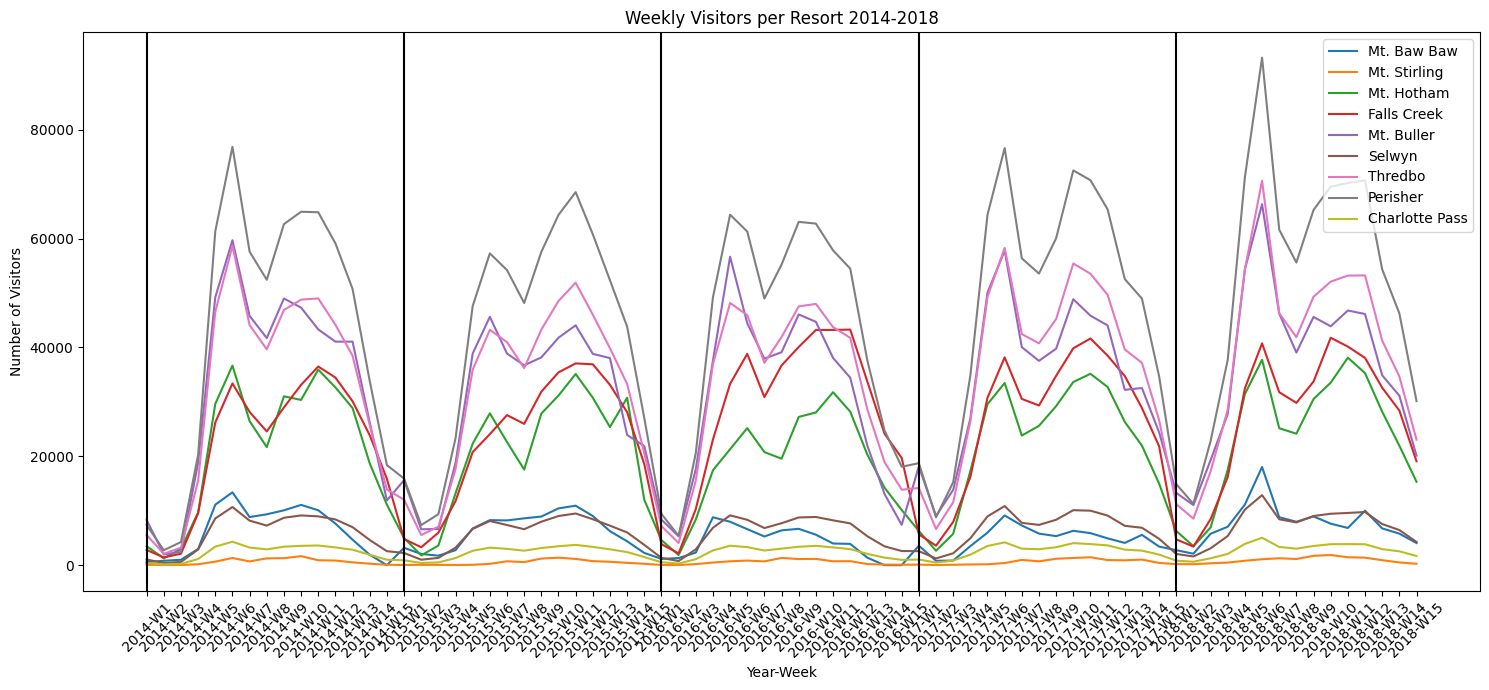

In [15]:
## VISITATION TRENDS - Visitation Per Resort Between 2014-2018
df_recent = vis_df[vis_df['Year'] <= 2018].copy()
df_recent['time'] = df_recent['Year'].astype(str) + '-W' + df_recent['Week'].astype(str)

plt.figure(figsize=(15, 7))

resort_columns = df_recent.columns[2:-1] if 'time' in df_recent.columns else df_recent.columns[2:]  # adjust if needed
for resort in resort_columns:
    plt.plot(df_recent['time'], df_recent[resort], label=resort)

highlight_weeks = df_recent[(df_recent['Year'] == 2020) & (df_recent['Week'].between(11, 15))]
if not highlight_weeks.empty:
    plt.axvspan(highlight_weeks['time'].iloc[0], highlight_weeks['time'].iloc[-1],
                color='grey', alpha=0.3, label='COVID-19 Effects')

plt.xticks(rotation=45)
plt.axvline('2014-W1', color='black')
plt.axvline('2015-W1', color='black')
plt.axvline('2016-W1', color='black')
plt.axvline('2017-W1', color='black')
plt.axvline('2018-W1', color='black')
plt.xlabel("Year-Week")
plt.ylabel("Number of Visitors")
plt.title("Weekly Visitors per Resort 2014-2018")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

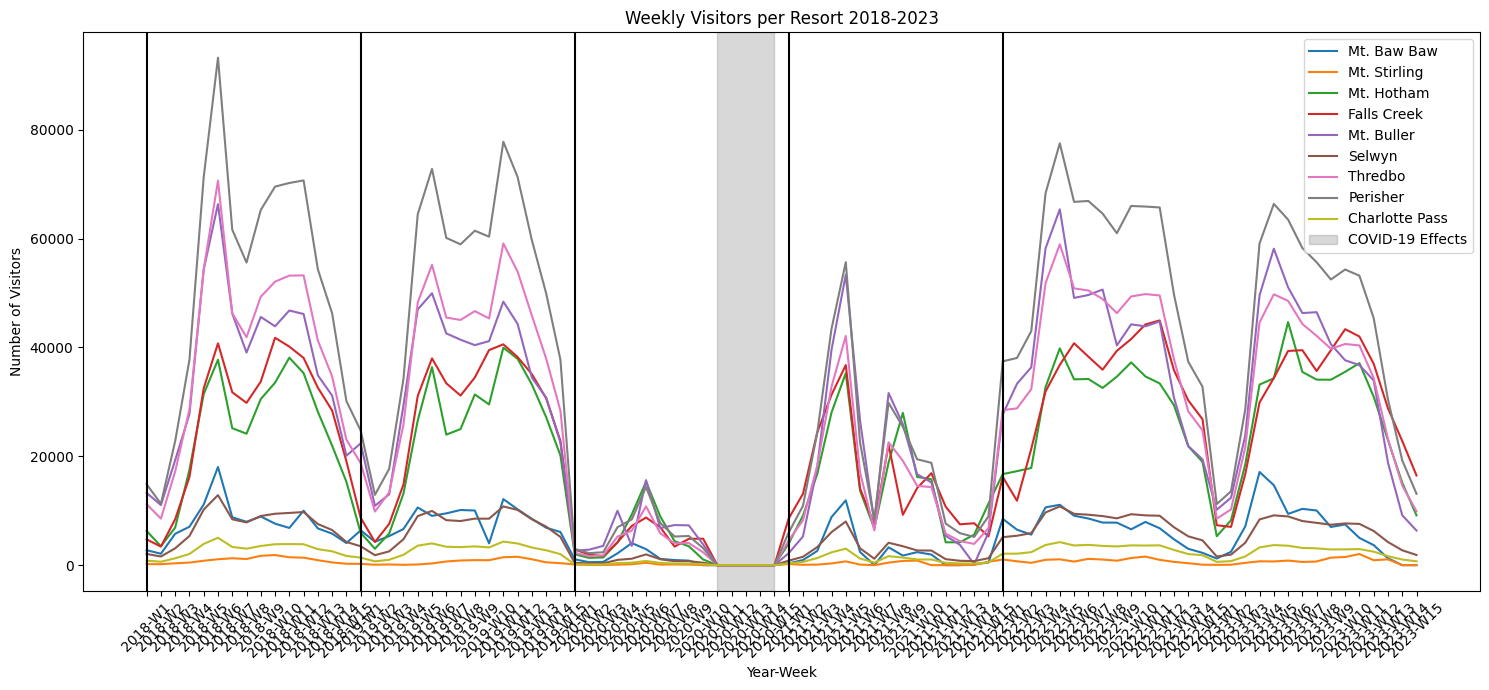

In [21]:
## VISITATION TRENDS - Visitation Per Resort Between 2018-2023 BEFORE IMPUTING
df_recent = vis_raw[vis_raw['Year'] <= 2023].copy()
df_recent = df_recent[df_recent['Year'] >= 2018].copy()
df_recent['time'] = df_recent['Year'].astype(str) + '-W' + df_recent['Week'].astype(str)

plt.figure(figsize=(15, 7))

resort_columns = df_recent.columns[2:-1] if 'time' in df_recent.columns else df_recent.columns[2:]  # adjust if needed
for resort in resort_columns:
    plt.plot(df_recent['time'], df_recent[resort], label=resort)

highlight_weeks = df_recent[(df_recent['Year'] == 2020) & (df_recent['Week'].between(11, 15))]
if not highlight_weeks.empty:
    plt.axvspan(highlight_weeks['time'].iloc[0], highlight_weeks['time'].iloc[-1],
                color='grey', alpha=0.3, label='COVID-19 Effects')

plt.xticks(rotation=45)
plt.axvline('2018-W1', color='black')
plt.axvline('2019-W1', color='black')
plt.axvline('2020-W1', color='black')
plt.axvline('2021-W1', color='black')
plt.axvline('2022-W1', color='black')
plt.xlabel("Year-Week")
plt.ylabel("Number of Visitors")
plt.title("Weekly Visitors per Resort 2018-2023")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

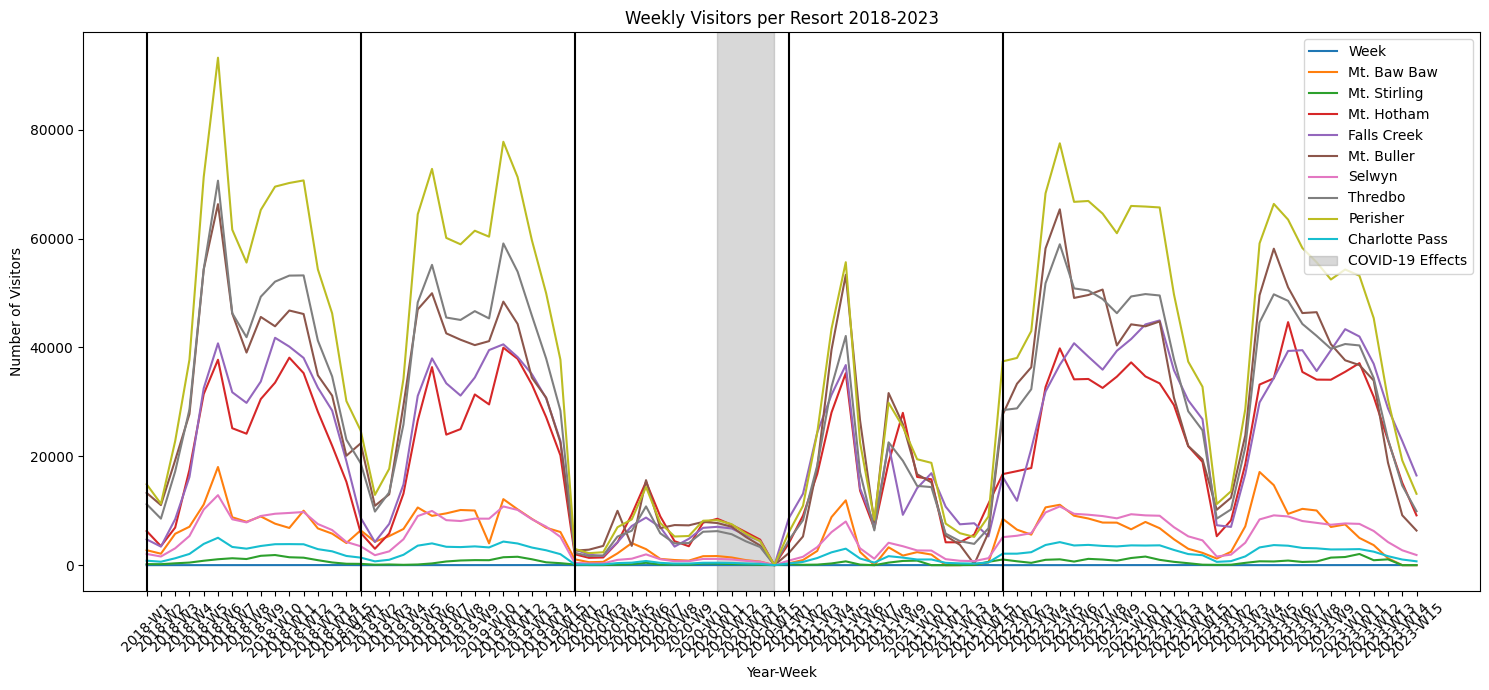

In [20]:
## VISITATION TRENDS - Visitation Per Resort Between 2018-2023 AFTER IMPUTING
df_recent = vis_clean[vis_clean['Year'] <= 2023].copy()
df_recent = df_recent[df_recent['Year'] >= 2018].copy()
df_recent['time'] = df_recent['Year'].astype(str) + '-W' + df_recent['Week'].astype(str)

plt.figure(figsize=(15, 7))

resort_columns = df_recent.columns[2:-1] if 'time' in df_recent.columns else df_recent.columns[2:]  # adjust if needed
for resort in resort_columns:
    plt.plot(df_recent['time'], df_recent[resort], label=resort)

highlight_weeks = df_recent[(df_recent['Year'] == 2020) & (df_recent['Week'].between(11, 15))]
if not highlight_weeks.empty:
    plt.axvspan(highlight_weeks['time'].iloc[0], highlight_weeks['time'].iloc[-1],
                color='grey', alpha=0.3, label='COVID-19 Effects')

plt.xticks(rotation=45)
plt.axvline('2018-W1', color='black')
plt.axvline('2019-W1', color='black')
plt.axvline('2020-W1', color='black')
plt.axvline('2021-W1', color='black')
plt.axvline('2022-W1', color='black')
plt.xlabel("Year-Week")
plt.ylabel("Number of Visitors")
plt.title("Weekly Visitors per Resort 2018-2023")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The imputation of visitation values in Weeks 10-14 of 2020's ski period does not seem disjointed and follows the general flow of this graph. Thus, we can proceed with this imputation in the cleaned dataset.